<a href="https://colab.research.google.com/github/19rehan/ML-Projects/blob/main/regression_tree_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Trees
Perform basic data preprocessing using Scikit-Learn

Model a regression task using Scikit-Learn

Train a Decision Tree Regressor model

Run inference and assess the quality of the trained models
Introduction

The dataset used in this exercise session is a subset of the publicly available TLC Dataset (all rights reserved by Taxi & Limousine Commission (TLC), City of New York). The prediction of the tip amount can be modeled as a regression problem. To train the model you can use part of the input dataset and the remaining data can be used to assess the quality of the trained model.

In [3]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'

df = pd.read_csv(url)
df.sample(5)

VendorID  passenger_count  trip_distance  RatecodeID  \
17846         2                2          17.28           2   
33547         2                2          18.16           2   
13680         2                1          17.74           2   
31978         2                1          20.53           2   
10703         2                1          17.83           2   

       store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
17846                   1           132            48             1   
33547                   1           132            79             1   
13680                   1           132           186             1   
31978                   1           132           238             1   
10703                   1           132           144             1   

       fare_amount  mta_tax  tolls_amount  improvement_surcharge  tip_amount  
17846         70.0      0.5          6.94                      1       16.54  
33547         70.0      0.5          0.00                      1       14.80  
13680         70.0      0.5          6.94                      1       20.23  
31978         70.0      0.5          6.94                      1       16.19  
10703         70.0      0.5          0.00                      1       10.00

In [46]:
df = df.drop(['payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'],axis = 1)

In [47]:
corelation_value = df.corr()['tip_amount'].drop('tip_amount')

<Axes: >

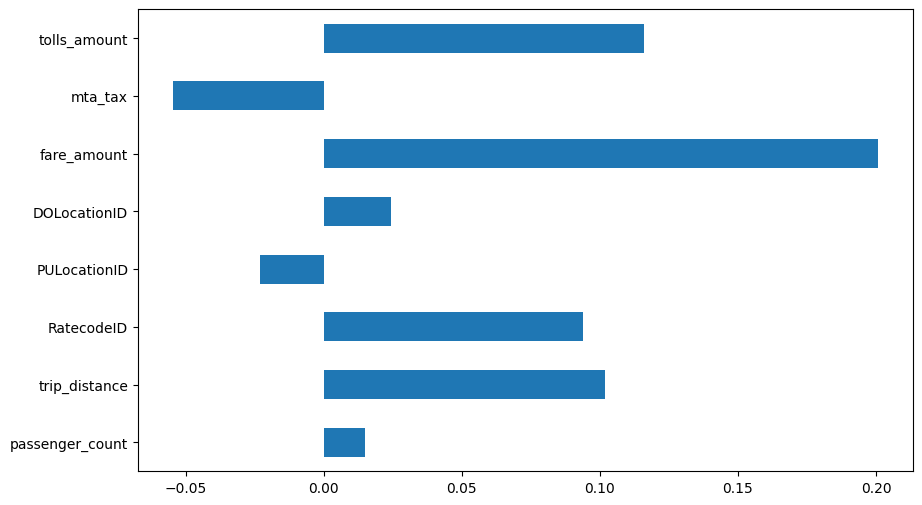

In [48]:
corelation_value.plot(kind = 'barh' , figsize = (10,6))

In [49]:
y = df[['tip_amount']].values.astype('float32')

drop_target = df.drop(['tip_amount'], axis = 1)

X = drop_target.values

X = normalize(X, axis = 1, norm = 'l1', copy = False)

In [50]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state = 42)

In [60]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion = 'squared_error' ,random_state = 35 ,max_depth = 4)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=35)

In [61]:
y_pred = regressor.predict(X_test)

mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = regressor.score(X_test, y_test)
print('R2 score : {0:.3f}'.format(r2_score))

MSE score : 24.468
R2 score : 0.031


In [27]:
cheking = df.corr()['tip_amount'].drop('tip_amount' )
cheking

VendorID                      NaN
passenger_count          0.015081
trip_distance            0.101819
RatecodeID               0.094075
store_and_fwd_flag       0.000320
PULocationID            -0.023086
DOLocationID             0.024348
payment_type                  NaN
fare_amount              0.200638
mta_tax                 -0.054488
tolls_amount             0.116172
improvement_surcharge   -0.000727
Name: tip_amount, dtype: float64

In [25]:
cheking = df.corr()['tip_amount'].drop('tip_amount' )
abs(cheking).sort_values(ascending = False)[:3]

fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64

In [53]:
df

passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
0                    1          17.63           2           132           164   
1                    1          19.52           2           132           236   
2                    1          17.81           2           132            48   
3                    2          19.30           2           132           148   
4                    1          18.75           2           132           234   
...                ...            ...         ...           ...           ...   
41197                1          16.94           2           132           164   
41198                4          19.83           2           132           166   
41199                1          17.31           2           132           137   
41200                1          17.28           2           132           233   
41201                1          16.82           2           132           170   

       fare_amount  mta_tax  tolls_amount  tip_amount  
0             70.0      0.5          6.94       16.54  
1             70.0      0.5          6.94       16.19  
2             70.0      0.5          6.94       12.00  
3             70.0      0.5          0.00        5.00  
4             70.0      0.5          6.94       10.00  
...            ...      ...           ...         ...  
41197         70.0      0.5          6.94        5.00  
41198         70.0      0.5          6.94        8.00  
41199         70.0      0.5          6.94        8.00  
41200         70.0      0.5          6.94       16.19  
41201         70.0      0.5          6.94        4.13  

[41202 rows x 9 columns]